<h2>Importing libraries</h2>

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D

<h3>Helper function to obtain all the parameters</h3>

In [57]:
def readParams(hops: int) -> tuple: 
    folder = 'results_GNN_10_10_0_{}HOP/k_5'.format(hops)

    match hops:
        case 1: Dur = 2385.3496313095093
        case 2: Dur = 3546.325671195984
        case 3: Dur = 16073.169048309326
        case _: print("Parameter hops should be either 1, 2, or 3.")

    with open(os.path.join(folder, 'mean_ttl_received_k_5.pkl'), 'rb') as fileObj:
        TTL = np.mean(pkl.load(fileObj))

    with open(os.path.join(folder, 'num_packets_received_k_5.pkl'), 'rb') as fileObj:
        Packets = np.mean(pkl.load(fileObj))

    return Dur, TTL, Packets
    

In [134]:
def generatePlots():

    resultsMatrix = np.vstack([np.array(readParams(i)) for i in range(1, 4)])
    print(resultsMatrix, '\n\n') # col 1: duration (s) | col 2: mean TTL (s/timesteps) | col 3: number of packets delivered 

    categories = [1, 2, 3]
    plt.tight_layout()
    # Duration sub-plot
    fig1 = plt.figure(figsize=(6, 5))
    ax1 = fig1.add_subplot(111)
    ax1.bar(categories, resultsMatrix[:, 0], width=0.6, color='#FFA07A')
    ax1.set_title('Supplement 1: Effect of Number of Hops on Duration')
    ax1.set_xlabel('Number of Hops')
    ax1.set_ylabel('Evaluation Execution Duration (s)')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    fig1.savefig(os.path.join('Plots/', 'Supplement 1 - Effect of Number of Hops on Duration.png'), dpi=300, bbox_inches='tight')

    # Mean TTL sub-plot
    fig2 = plt.figure(figsize=(6, 5))
    ax2 = fig2.add_subplot(111) 
    ax2.bar(categories, resultsMatrix[:, 1], width=0.6, color='#90EE90')
    ax2.set_title('Supplement 2: Effect of Number of Hops on Mean TTL of Packets at Base Station')
    ax2.set_xlabel('Number of Hops')
    ax2.set_ylabel('Mean TTL (s)')
    ax2.axhline(y=1000, color='gray', linestyle='--', linewidth=1)
    legend_line = Line2D([0], [0], color='gray', linestyle='--', lw=1)
    ax2.legend(handles=[legend_line], labels=['Initial TTL of Packets Sent by the IoTNodes'], loc='lower left')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True)) 

    fig2.savefig(os.path.join('Plots/', 'Supplement 2 - Effect of Number of Hops on Mean TTL.png'), dpi=300, bbox_inches='tight')

    # Packet delivery sub-plot
    fig3 = plt.figure(figsize=(6, 5))
    ax3 = fig3.add_subplot(111)
    ax3.bar(categories, resultsMatrix[:, 2], width=0.6, color='#87CEFA')
    ax3.set_title('Supplement 3: Effect of Number of Hops on Number of Packets received by the Base Station')
    ax3.set_xlabel('Number of Hops')
    ax3.set_ylabel('Number of Packets')
    ax3.axhline(y=4000, color='gray', linestyle='--', linewidth=1)
    legend_line = Line2D([0], [0], color='gray', linestyle='--', lw=1)
    ax3.legend(handles=[legend_line], labels=['Total Number of Packets Sent by the IoTNodes'], loc='lower left')
    ax3.xaxis.set_major_locator(MaxNLocator(integer=True)) 

    fig3.savefig(os.path.join('Plots/', 'Supplement 3 - Effect of Number of Hops on Packets delivered.png'), dpi=300, bbox_inches='tight')
    

    plt.show()

    

[[ 2385.34963131   755.36825     4000.        ]
 [ 3546.3256712    615.50475     4000.        ]
 [16073.16904831   660.93341902  3890.        ]] 




<Figure size 640x480 with 0 Axes>

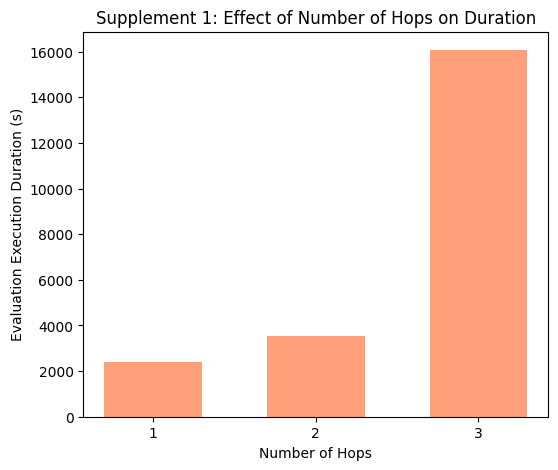

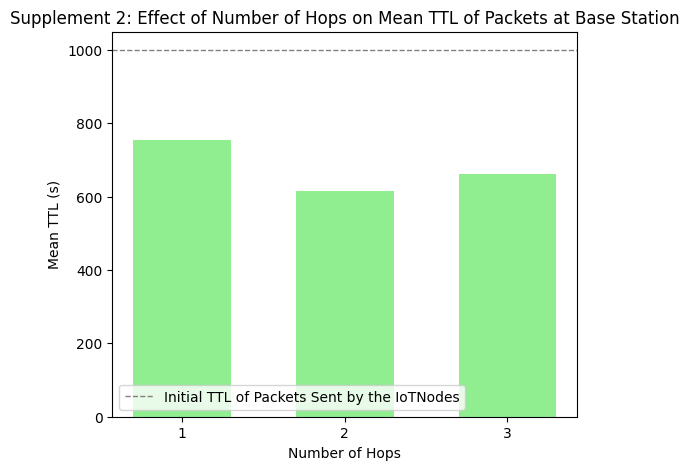

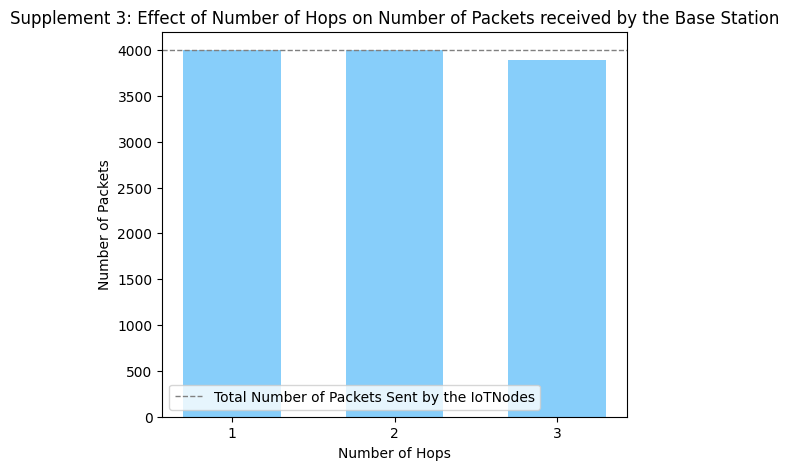

In [135]:
generatePlots()